1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.
2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.
3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.
4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.
5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).


In [1]:
import pandas as pd 

In [2]:
#a. Load the dataset and perform exploratory data analysis (EDA). 
#b. Examine the features, their types, and summary statistics. 
data_1=pd.read_csv("Titanic_train.csv")
data_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# dropping the irrelavant column 
data_1.drop(columns=["Name",'PassengerId','Ticket','Cabin'],inplace=True)
data_1


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
data_1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data_2=pd.read_csv("Titanic_test.csv")

In [6]:
# dropping irrelavant columns 
data_2.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1,inplace=True)
data_2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [7]:
data_2.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
#2. Data Preprocessing:
#a. Handle missing values (e.g., imputation).
#b. Encode categorical variables.

In [9]:
# mere the two data_1 & data_2 
data=pd.concat([data_1,data_2])
# checking missing values of data
data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [10]:
# Instead of dropping missing values adding mean of that particular column_mean
data["Survived"].fillna(data["Survived"].mean(),inplace=True)
data["Age"].fillna(data["Age"].median(),inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)
data["Fare"].fillna(data["Fare"].median(),inplace=True)

In [11]:
#  verifying is there any missing values are left 
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
# checking the duplicates values 
data.duplicated().sum()
data.dropna(inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
# Encode the categorical data 
from sklearn.preprocessing import LabelEncoder
label_encode_1=LabelEncoder()
data["Survived"]=label_encode_1.fit_transform(data["Survived"])
data["Age"]=label_encode_1.fit_transform(data["Age"])
data["Fare"]=label_encode_1.fit_transform(data["Fare"])
data["Sex"]=label_encode_1.fit_transform(data["Sex"])
data["Embarked"]=label_encode_1.fit_transform(data["Embarked"])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,32,1,0,20,2
1,2,1,0,57,1,0,237,0
2,2,3,0,39,0,0,50,2
3,2,1,0,53,1,0,217,2
4,0,3,1,53,0,0,52,2
...,...,...,...,...,...,...,...,...
413,1,3,1,42,0,0,52,2
414,1,1,0,59,0,0,261,0
415,1,3,1,58,0,0,20,2
416,1,3,1,42,0,0,52,2


# c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features. Analyze any patterns or correlations observed in the data.

Text(0, 0.5, 'Survival Probability')

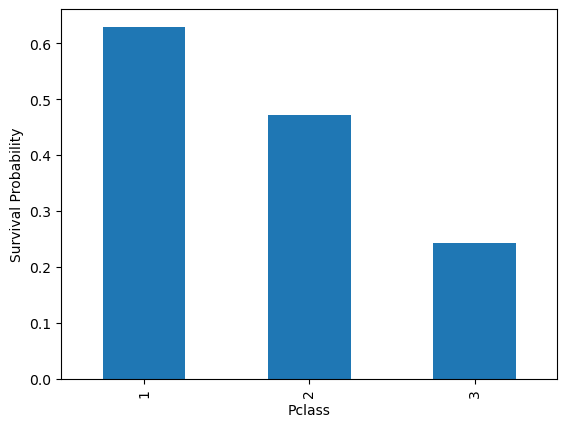

In [14]:
#Visualization of 'Survived' vs 'Pclass' (Target column) of training data
plt=data_1[["Pclass","Survived"]].groupby("Pclass").mean().Survived.plot(kind="bar")
plt.set_xlabel("Pclass")
plt.set_ylabel("Survival Probability")


Text(0, 0.5, 'Survival Probability')

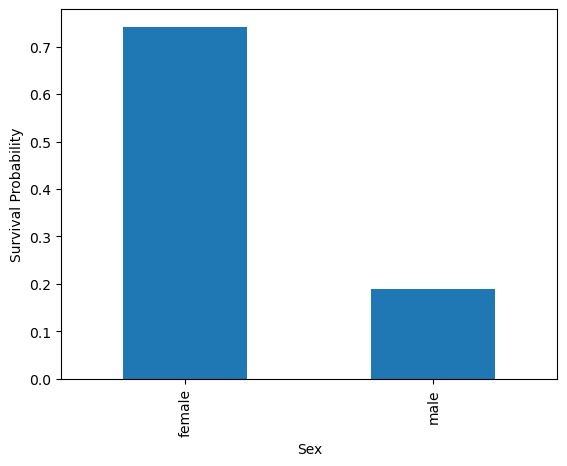

In [15]:
#Visualization of "Survived" vs "sex"
plt=data_1[["Sex","Survived"]].groupby("Sex").mean().Survived.plot(kind="bar")
plt.set_xlabel("Sex")
plt.set_ylabel("Survival Probability")


In [16]:
#3. Model Building:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings as warnings 
warnings.filterwarnings("ignore")
# separate features & target from training datasets
features=data.drop(columns=['Survived'],axis=1)
target=data["Survived"]
# Split the data into training and validation sets
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=100)
#a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
#b. Train the model using the training data.

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(x_train,y_train)

# Access coefficients
cofficients=log_reg.coef_
print("Cofficients:-",cofficients)
intercepts=log_reg.intercept_
print("intercept:-",intercepts)
y_pred=log_reg.predict(x_test)

Cofficients:- [[ 3.61327946e-01  1.21794652e+00  1.13996598e-02  1.91991665e-01
   1.57531513e-01 -1.74747040e-03  2.02327460e-01]
 [ 2.77099441e-02 -3.48547200e-02  1.81104475e-03  8.39116259e-03
  -1.00658682e-01  1.13525238e-04 -1.49646564e-01]
 [-3.89037890e-01 -1.18309180e+00 -1.32107046e-02 -2.00382827e-01
  -5.68728309e-02  1.63394516e-03 -5.26808956e-02]]
intercept:- [-2.16689739  0.2831471   1.88375029]


In [17]:
#4. Model Evaluation:
#a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
accuracy_score=accuracy_score(y_test,y_pred)
precision_score=precision_score(y_test,y_pred,average="weighted")
recall_score=recall_score(y_test,y_pred,average="weighted")
f1=f1_score(y_test,y_pred,average="weighted")
print(f"Accuracy: {accuracy_score}")
print(f"Precision: {precision_score}")
print(f"Recall: {recall_score}")
print(f"F1-score: {f1}")

# Makes predictions on the test data using the trained model.
test_pred=log_reg.predict(features)

# Calculate the number of correct predictions
num_correct = sum(test_pred == target)
# calculate the number of nu_incorrect predictions 
num_incorrect=len(target)-num_correct

# Calculate the total number of predictions 
total_predictions = len(test_pred)

# Calculate accuracy
accuracy = num_correct / total_predictions

print("Number of correct predictions:", num_correct)
print("Number of incorrect predictions:", num_incorrect)
print("Total predictions:", total_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5725190839694656
Precision: 0.5353852075429737
Recall: 0.5725190839694656
F1-score: 0.5394447771112543
Number of correct predictions: 718
Number of incorrect predictions: 591
Total predictions: 1309
Accuracy: 0.5485103132161956


Text(0.5, 1.0, 'Number of correct & incorrect predictions')

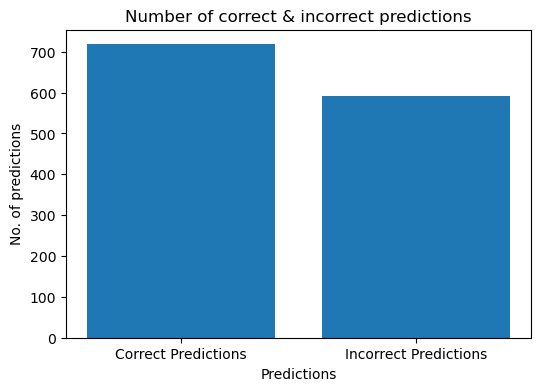

In [18]:
# plotting the correct & incorrect predictions
import matplotlib.pyplot as plt 
plt.figure(figsize=(6,4))
plt.bar(["Correct Predictions","Incorrect Predictions"],[num_correct,num_incorrect])
plt.xlabel("Predictions")
plt.ylabel("No. of predictions")
plt.title("Number of correct & incorrect predictions")

In [19]:
print(set(y_test))

{0, 1, 2}


In [22]:
# Verify predict_proba shape
y_pred_proba_class1 =log_reg.predict_proba(x_test)
print(y_pred_proba_class1.shape)

# Calculate probabilities for positive class (class 1)
y_pred_proba_class1=log_reg.predict_proba(x_test)[:,1]


# y_test contains three classes ({0, 1, 2})
# binarized the output
from sklearn.preprocessing import label_binarize
y_test_binarized=label_binarize(y_test,classes=[0,1,2])
n_classes=y_test_binarized.shape[1]
print(f'Number of classes:-',n_classes)
# compute ROC and ROC AUC 
fpr=dict()
tpr=dict()
roc_auc_=dict()

for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_test_binarized[:,i],y_pred_proba_class1[:,i])
    roc_auc_[i]=auc(fpr[i],tpr[i])

# Plot all the curves 
plt.plot([0,1],[0,1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

(393, 3)
Number of classes:- 3


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
# Additional performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

#  Deployment with Streamlit: 

In [ ]:
print(set(y_test))

In [ ]:
import pickle
import streamlit as st 
import warnings
warnings.filterwarnings("ignore")
# create file and make the file write using pickle
file="log_reg.pkl"
pickle.dump(log_reg,open(file,"wb"))

In [ ]:
# Open the file 
Model_log_reg=pickle.load(open(file,"rb"))

In [ ]:
# create a header for model
st.subheader("Model Deployment Using Logistic Regression")

# create a subheader 
st.sidebar.subheader("User Parameters")

In [ ]:
# Using a pre-trained learning model for predictions

# Streamlit model:- 
----------------------------------------------------------------------------
def predict_model(Sex,Age,Fare,Embarked):
    predictions=[[Sex,Age,Fare,Embarked]]
    return predictions[0]
def main():
    st.title("Model_Predictions")
    Sex=st.sidebar.checkbox("Gender:0-Female,1-Male",[0,1])
    Age=st.sidebar.number_input("Age")
    Fare=st.sidebar.number_input("Fare")
    Embarked=st.sidebar.selectbox("Embarked:C-0,S-1,Q-2",[0,1,2])
    if st.button("Click"):
        results=predict_model(Sex,Age,Fare,Embarked)
        if results==0:
            st.success("No")
        else:
            st.success("Yes")
if __name__=="__main__":
    main()